# Unstructured Data Analytics HW2

Name: Mingwei Gao

Andrew ID: mingweig

Reminder: you should not be sharing code.

### Instructions
1. Fill in your name and Andrew ID above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on Canvas to make sure that the code actually runs without errors. (**Important**: Any code cells that you have entered code for but did not actually execute will be disregarded, so please be sure to actually run your code first and make sure it runs without errors! We may re-run a subset of your code for grading purposes).
5. Be careful about where you save data for use with this Jupyter notebook (more details on this later).
6. You are encouraged to seek assistance from ChatGPT in developing your code.

## **Part 1 (70 points)**: Topic Analysis

### Load 20 Newsgroups Data

We examine the [20 Newsgroups dataset](http://qwone.com/~jason/20Newsgroups/), a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. This data is widely used for experiments in text applications of machine learning techniques, such as text classification and text clustering. We load this data set from `sklearn.datasets`:

In [50]:
from sklearn.datasets import fetch_20newsgroups
from tqdm.notebook import tqdm

# load both training and testing data from 20 newsgroups
raw_dataset = fetch_20newsgroups(subset='all', shuffle=False)
print('First document of the raw dataset:')
print(raw_dataset.data[0])

# remove the headers, footers, and quotes from the documents.
dataset = fetch_20newsgroups(subset='all', shuffle=False, remove=('headers', 'footers', 'quotes'))
print('First document of the processed dataset:')
print(dataset.data[0])

First document of the raw dataset:
From: cubbie@garnet.berkeley.edu (                               )
Subject: Re: Cubs behind Marlins? How?
Article-I.D.: agate.1pt592$f9a
Organization: University of California, Berkeley
Lines: 12
NNTP-Posting-Host: garnet.berkeley.edu


gajarsky@pilot.njin.net writes:

morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)

       This season so far, Morgan and Guzman helped to lead the Cubs
       at top in ERA, even better than THE rotation at Atlanta.
       Cubs ERA at 0.056 while Braves at 0.059. We know it is early
       in the season, we Cubs fans have learned how to enjoy the
       short triumph while it is still there.

First document of the processed dataset:

morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be 

Here we take a closer look at the data structure of the processed `dataset` object:

In [2]:
corpus = dataset.data   # raw docs
labels = dataset.target # labels
print(f'Length of corpus: {len(corpus)}, length of labels: {len(labels)}')
print(f'Type of corpus: {type(corpus)}, type of labels: {type(labels)}')
print(f'List of topics: {dataset.target_names}')
print(f'First 5 labels and the corresponding topics: {list(zip(labels[:5], [dataset.target_names[i] for i in labels[:5]]))}')

Length of corpus: 18846, length of labels: 18846
Type of corpus: <class 'list'>, type of labels: <class 'numpy.ndarray'>
List of topics: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
First 5 labels and the corresponding topics: [(9, 'rec.sport.baseball'), (4, 'comp.sys.mac.hardware'), (11, 'sci.crypt'), (4, 'comp.sys.mac.hardware'), (0, 'alt.atheism')]


### **Part 1.1 (5 points)**: Data Preprocessing

Please implement the `preprocess` method which takes arbitrary `text`, does the following, and returns the processed text:
* Remove punctuation, if any;
* Remove digits, if any;
* Remove white spaces (including new lines, `\n`), if any;
* Change every letter to lowercase.

For example, the following text:

`\nmorgan and guzman will have era's 1 run higher than last year, and\n the cubs will be idiots and not pitch harkey as much as hibbard.\n castillo won't be good (i think he's a stud pitcher)`

should be processed into:

`morgan and guzman will have eras run higher than last year and the cubs will be idiots and not pitch harkey as much as hibbard castillo wont be good i think hes a stud pitcher`

In [4]:
import re
import string

def preprocess(text):
    # Write your code here
    text_no_punctuation = re.sub(r'[{}]+'.format(re.escape(string.punctuation)), '', text)
    text_no_digits = re.sub(r'\d+', '', text_no_punctuation)
    text_no_whitespaces = re.sub(r'\s+', ' ', text_no_digits).strip()
    processed_text = text_no_whitespaces.lower()
    return processed_text

Apply `preprocess` to every document in our corpus:

In [7]:
docs = []
for doc in corpus:
    docs.append(preprocess(doc))

print(docs[0])

morgan and guzman will have eras run higher than last year and the cubs will be idiots and not pitch harkey as much as hibbard castillo wont be good i think hes a stud pitcher


Apply TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to the preprocessed `docs`:

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', min_df=50, max_df=0.8)
X = vectorizer.fit_transform(docs).toarray()

# Print the number of words in the vocabulary
print(f'Number of words in the vocabulary: {len(vectorizer.vocabulary_)}')

# Compute the average TF-IDF score for each term
average_tfidf_scores = np.mean(X, axis=0)

# Convert average TF-IDF scores to a numpy array
average_tfidf_scores_array = np.array(average_tfidf_scores).flatten()

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Sort the scores and select the top 20
top_indices = np.argsort(average_tfidf_scores_array)[-20:]
top_words = feature_names[top_indices]

# Print the top 20 words
print(f'Top 20 words: {top_words}')

Number of words in the vocabulary: 3858
Top 20 words: ['used' 'right' 'want' 'did' 'need' 'way' 'make' 'new' 'time' 'good'
 'thanks' 'use' 'im' 'people' 'does' 'think' 'dont' 'know' 'just' 'like']


### **Part 1.2 (65 points)**: Text Clustering and Topic Analysis

##### **Part 1.2.1 (15 points)**: PCA

Please use PCA (Principal Component Analysis) to reduce the dimensionality of the first 5000 samples of the TF-IDF transformed dataset (`X`) to 2 principal components, and then visualize the distribution of these samples, categorized into 20 distinct topics, in a 2D plot. Discuss your results.

Your 2D plot should look like the following (doesn't have to be exact):

![pca](https://i.ibb.co/5n6HQZ9/hw2-pca.png)

In [24]:
from sklearn.decomposition import PCA

# Write your code here (10 points)
X_subset = X[:5000]
labels_subset = labels[:5000]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset)

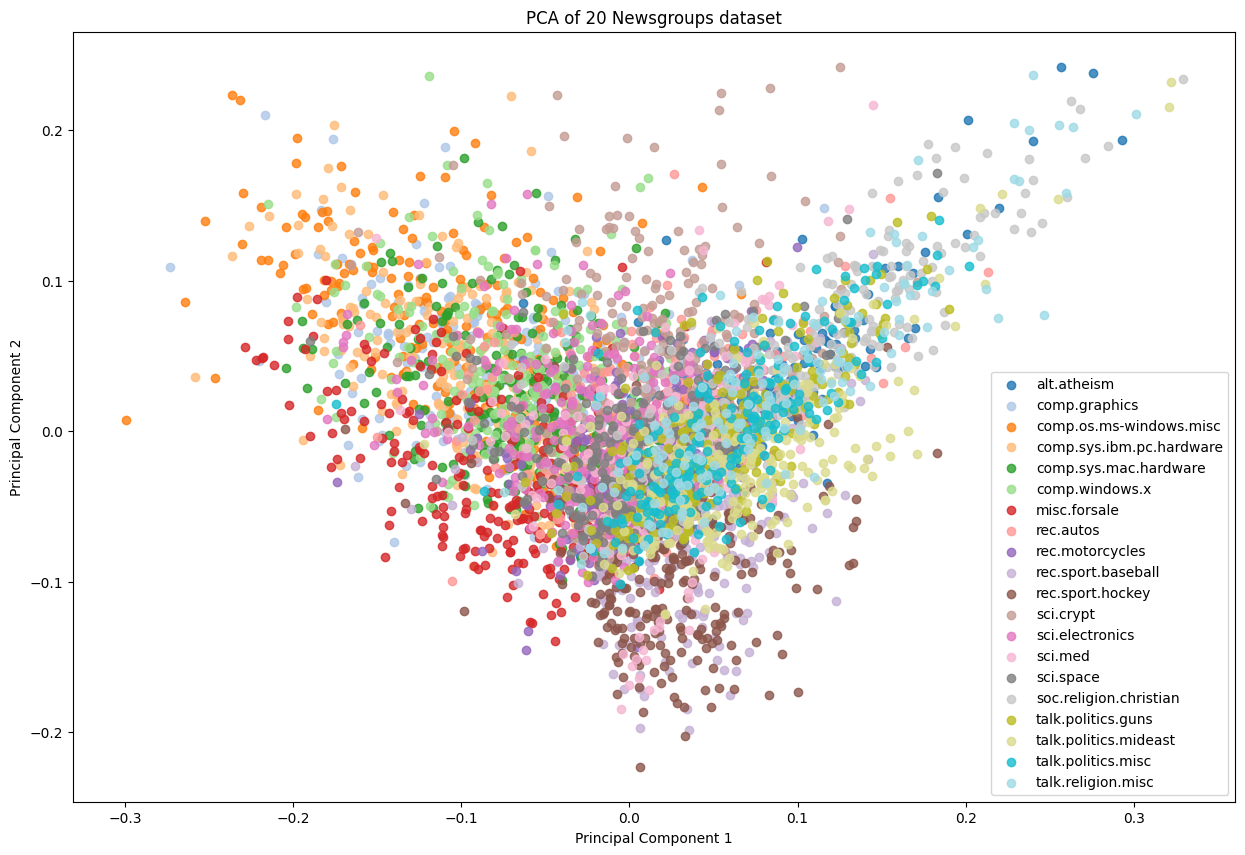

In [48]:
plt.figure(figsize=(15, 10))
colors = plt.colormaps.get_cmap('tab20')

for i, target_name in zip(range(20), dataset.target_names):
    plt.scatter(X_pca[labels[:5000] == i, 0], X_pca[labels[:5000] == i, 1], color=colors(i), alpha=0.8,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of 20 Newsgroups dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

*** Discuss your results here (5 points)***

The PCA visualization of the 20 Newsgroups dataset reveals a significant overlap among various topics, indicates that there is a shared vocabulary or similar content themes across different topics. While there are some clusters that can be identified, the overall blend of topics shows that many documents share terms across multiple subjects. This mix could pose a challenge for classification models and might require more sophisticated methods or additional features to achieve better separation.

##### **Part 1.2.2 (15 points)**: t-SNE

Please repeat the previous part with t-SNE (t-distributed Stochastic Neighbor Embedding) while varying `perplexity`. Your output should contain multiple 2D plots using the same set of hyperparameters (`learning_rate=800, angle=.99, init='pca'`) for `TSNE` except `perplexity`, which is recommended to span multiple degrees of magnitude.

0it [00:00, ?it/s]

<ipython-input-53-5a90b74961ad>:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


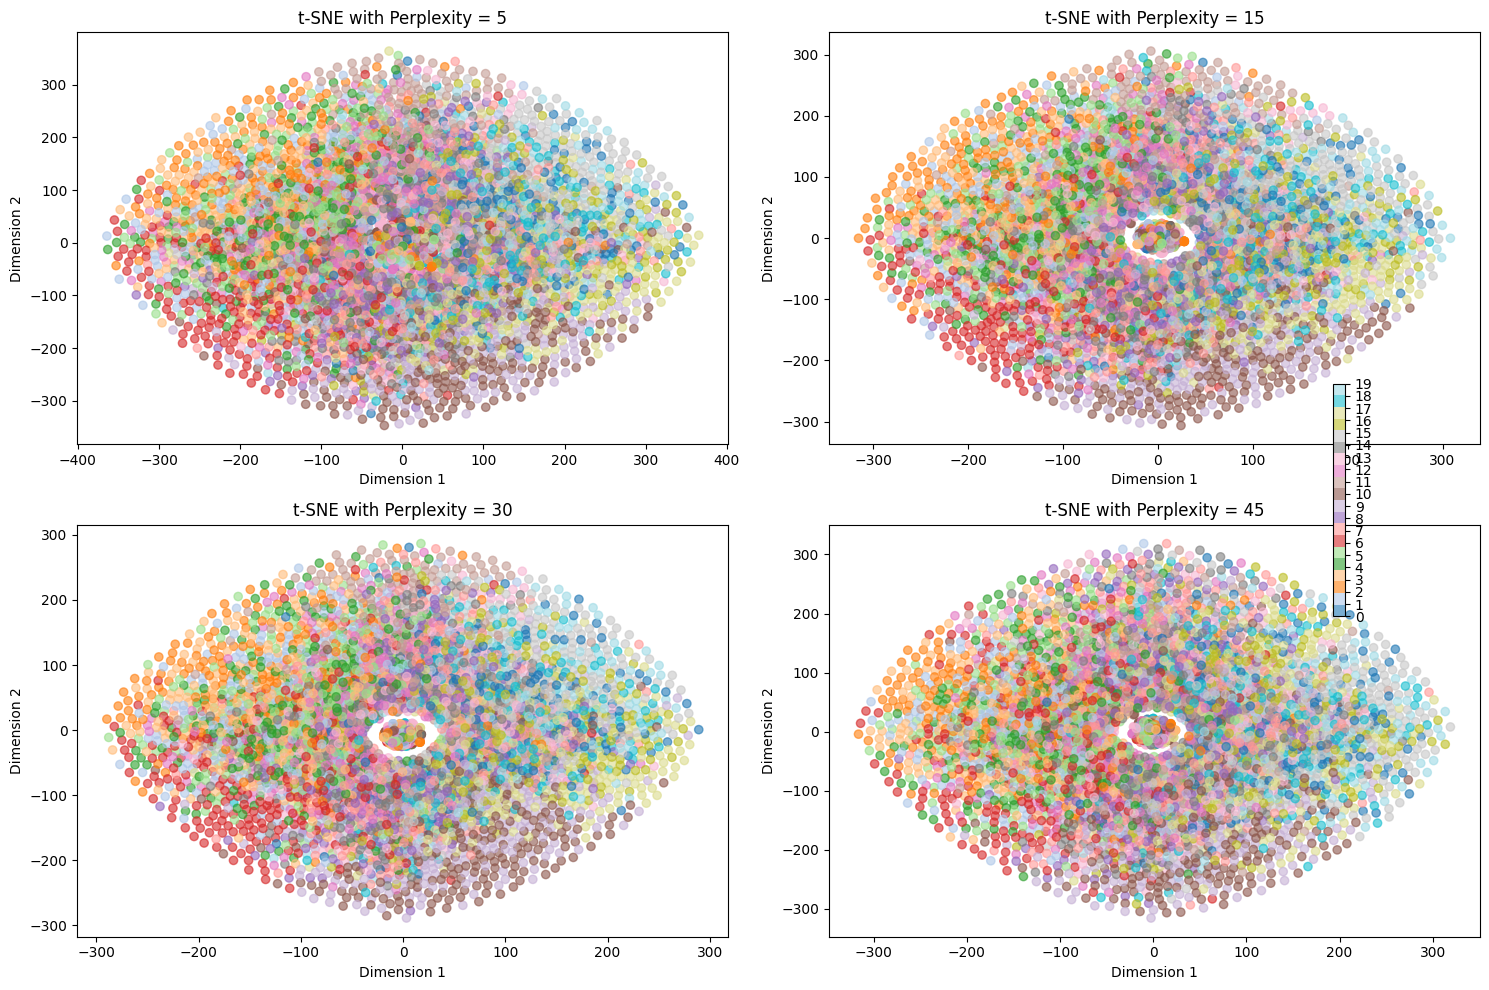

In [53]:
from sklearn.manifold import TSNE

# Write your code here
learning_rate = 800
angle = .99
init = 'pca'
perplexities = [5, 15, 30, 45]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, perplexity in tqdm(enumerate(perplexities)):
    tsne = TSNE(n_components=2, learning_rate=learning_rate, angle=angle, init=init, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X_subset)

    scatter = axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_subset, cmap='tab20', alpha=0.8)
    axes[i].set_title(f't-SNE with Perplexity = {perplexity}')
    axes[i].set_xlabel('Dimension 1')
    axes[i].set_ylabel('Dimension 2')

fig.colorbar(scatter, ax=axes, ticks=range(20), fraction=0.01)
plt.tight_layout()
plt.show()

##### **Part 1.2.3 (20 points)**: LDA and Topic Visualization

Please use Latent Dirichlet Allocation (LDA) to model 20 topics from the first 5000 samples of a dataset, and then apply t-SNE with varying `perplexity` to visualize the distribution of these topics and the true labels of the samples in 2D plots. Discuss what you observe from the plots.

You may follow the steps below:

1. **Initialize LDA**: Set up the Latent Dirichlet Allocation (LDA) model specifying the number of topics: `20`.

2. **Fit LDA Model**: Fit the LDA model on the first 5000 samples of your dataset `X` (`X[:5000]`). This step involves learning the topic representation of documents and the word distribution of topics.

3. **Transform Data**: Use the fitted LDA model to transform the same subset of data to get the topic distribution for each document. This results in a matrix where each row corresponds to a document and each column to a topic's probability in that document.

4. **Identify Most Probable Topics**: For each document, identify the most probable topic by finding the index of the highest value in its topic distribution. This step classifies each document into a single topic based on the highest probability.

5. **t-SNE Visualization**:
   - For each specified `perplexity`:
     - **Initialize t-SNE**: Configure t-SNE with two components for 2D visualization.
     - **Fit and Transform with t-SNE**: Apply t-SNE to the topic distribution matrix obtained from LDA to reduce the dimensionality to two dimensions.
     - **Plot LDA-Based Distribution**: Create a scatter plot for the t-SNE output, coloring each point based on its most probable topic.
     - **Plot According to True Labels**: For comparison, create another scatter plot for the **same** t-SNE output, this time coloring each point based on its true label.

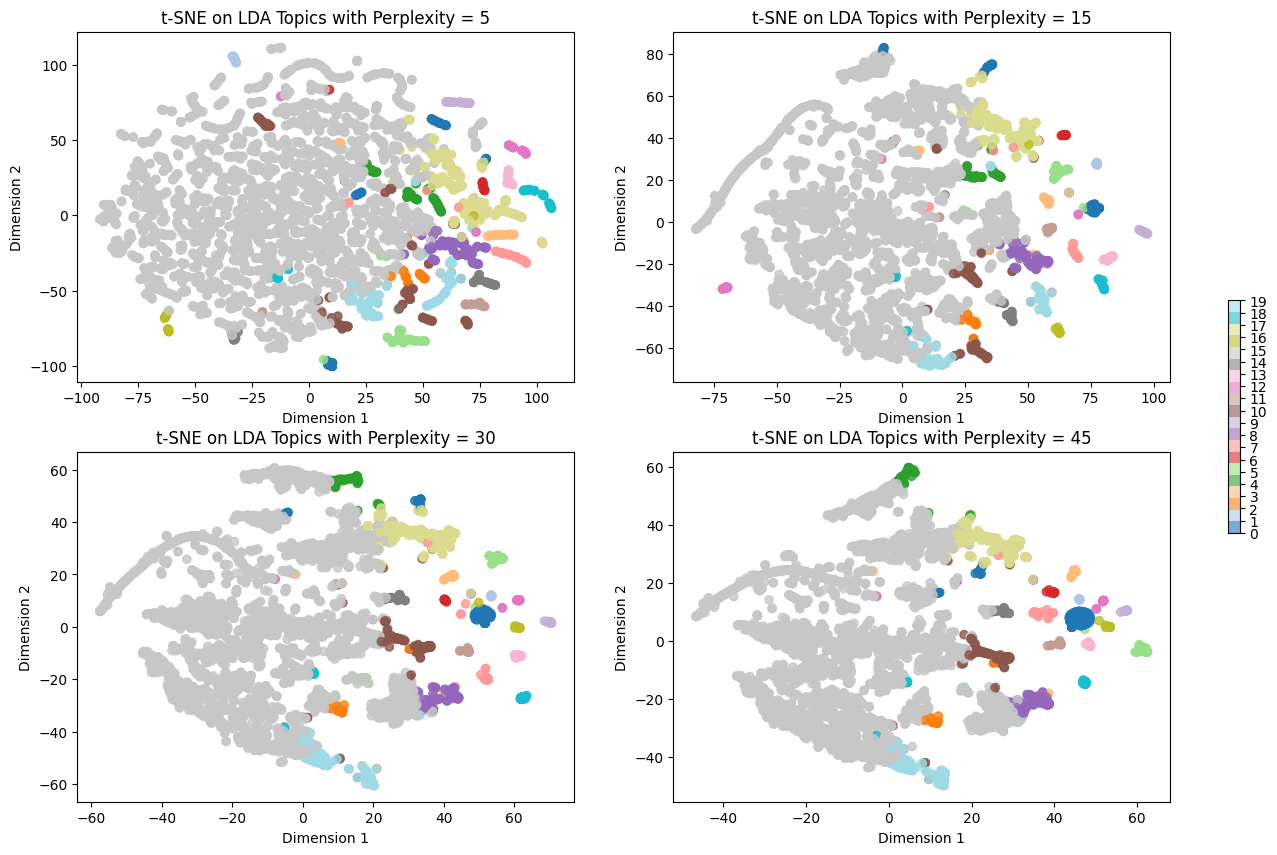

In [63]:
from sklearn.decomposition import LatentDirichletAllocation

# Write your code here (15 points)
n_topics = 20
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(X[:5000])

topic_distribution = lda.transform(X[:5000])
most_probable_topics = np.argmax(topic_distribution, axis=1)

perplexities = [5, 15, 30, 45]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

tsne_outputs = []
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, learning_rate=800, angle=.99, init='pca', perplexity=perplexity)
    tsne_output = tsne.fit_transform(topic_distribution)
    tsne_outputs.append(tsne_output)

    axes[i].scatter(tsne_output[:, 0], tsne_output[:, 1], c=most_probable_topics, cmap='tab20', alpha=0.8)
    axes[i].set_title(f't-SNE on LDA Topics with Perplexity = {perplexity}')
    axes[i].set_xlabel('Dimension 1')
    axes[i].set_ylabel('Dimension 2')

fig.colorbar(scatter, ax=axes, ticks=range(20), fraction=0.01, location = 'right')
plt.show()

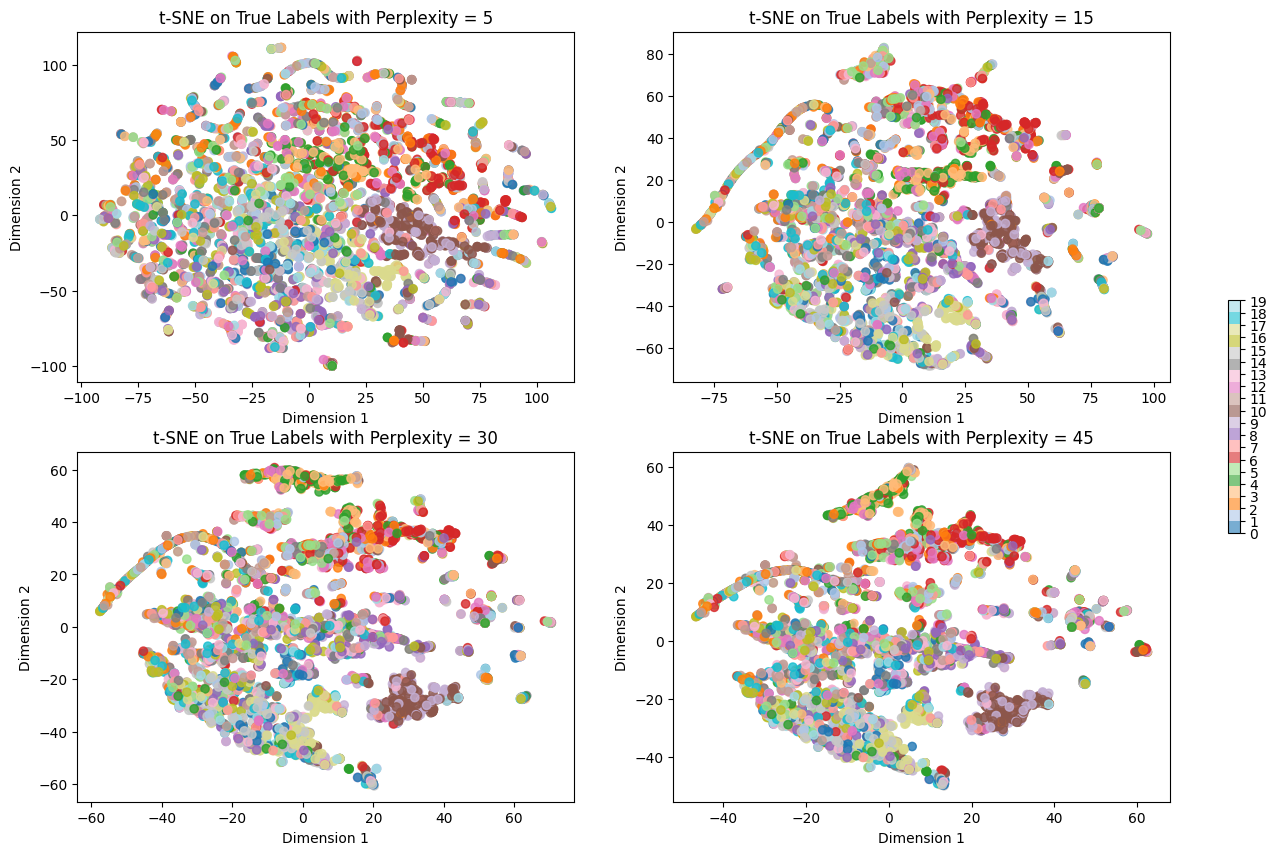

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, perplexity in enumerate(perplexities):

    axes[i].scatter(tsne_outputs[i][:, 0], tsne_outputs[i][:, 1], c=labels[:5000], cmap='tab20', alpha=0.8)
    axes[i].set_title(f't-SNE on True Labels with Perplexity = {perplexity}')
    axes[i].set_xlabel('Dimension 1')
    axes[i].set_ylabel('Dimension 2')

fig.colorbar(scatter, ax=axes, ticks=range(20), fraction=0.01, location = 'right')
plt.show()

*** Discuss your results here (5 points)***

The t-SNE visualizations shows how the documents from the 20 dataset are grouped when reduced to two dimensions, both in terms of LDA topics and true topics. As the perplexity increases, we see a transition from a dispersed arrangement to more distinct clusters but labels are still overlapping. This shows that as perplexity goes up, it better captures the underlying structure of the data. The plots based on true labels display more overlap than those based on LDA topics, implies that LDA may be emphasizing certain aspects of the data that lead to clearer separation in the reduced space. However, even with LDA topics, the clusters are not completely separated, which could imply topic similarities could be high.

##### **Part 1.2.4 (15 points)**: LDA and Topic Analysis

Please show the top 20 words along with their normalized importance probabilities for the first three topics as determined by an LDA model. Use the `LatentDirichletAllocation.components_` attribute (whose entries should have the same `len` as `vectorizer.vocabulary_`) to obtain the word probabilities for each topic. Normalize these probabilities within each topic to indicate the relative significance of each word. Discuss your results.

Your output should take this format (doesn't have to be exact):
```
Topic #0:
	top 1 word -- prob: ...
	top 2 word -- prob: ...
	top 3 word -- prob: ...
    	...
    	top 20 word -- prob: ...
Topic #1:
	top 1 word -- prob: ...
	top 2 word -- prob: ...
	top 3 word -- prob: ...
    	...
    	top 20 word -- prob: ...
Topic #2:
	top 1 word -- prob: ...
	top 2 word -- prob: ...
	top 3 word -- prob: ...
    	...
    	top 20 word -- prob: ...
```

In [89]:
lda.components_[0]

488.96722244569173

In [93]:
# Write your code here (10 points)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_[:3]):
        print(f"Topic #{topic_idx}:")

        topic_norm = (topic - np.mean(topic)) / np.std(topic)
        top_indices = topic_norm.argsort()[-no_top_words:][::-1] # sort
        for i in top_indices:
            print(f"\t{feature_names[i]} -- prob: {topic_norm[i]:.2f}")
        print("\n")


tf_feature_names = vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, 20)

Topic #0:
	window -- prob: 18.92
	widget -- prob: 15.85
	motif -- prob: 12.80
	battery -- prob: 12.54
	dave -- prob: 10.89
	hi -- prob: 10.26
	problems -- prob: 9.00
	kit -- prob: 8.83
	colors -- prob: 8.75
	needed -- prob: 8.17
	widgets -- prob: 7.90
	batteries -- prob: 7.45
	windows -- prob: 7.36
	appreciate -- prob: 7.26
	thanks -- prob: 7.21
	converter -- prob: 7.10
	visible -- prob: 7.03
	app -- prob: 6.97
	xlib -- prob: 6.83
	screen -- prob: 6.70


Topic #1:
	tickets -- prob: 25.69
	chris -- prob: 20.35
	earlier -- prob: 15.51
	buyer -- prob: 14.24
	saves -- prob: 13.21
	adam -- prob: 12.53
	ac -- prob: 12.19
	mailing -- prob: 11.32
	glass -- prob: 11.10
	repost -- prob: 9.62
	goes -- prob: 8.13
	list -- prob: 7.93
	meet -- prob: 7.88
	adult -- prob: 7.32
	male -- prob: 6.62
	film -- prob: 6.37
	fell -- prob: 6.16
	training -- prob: 5.73
	background -- prob: 5.66
	let -- prob: 5.64


Topic #2:
	armenians -- prob: 22.57
	armenian -- prob: 22.20
	turkish -- prob: 19.22
	greek -- pr

*** Discuss your results here (5 points)***

Looking at the top words from the first three topics, we can get a feel for what each one might represent.

Topic #0 has words like 'window', 'widget', and 'motif', possibly relating to computer software. Topic #1, with words like 'tickets', 'buyer', and 'mailing', could be about the buying and selling process, maybe in an online store. Topic #2 with words like 'armenians', 'armenian', 'turkish', pointing to historical and perhaps political discussions, potentially involving conflicts or relations between these groups. These topics show us the variety of conversations happening in the data set, which could help us to get an idea of what these topics might be.

## **Part 2 (30 points)**: Graph Modeling and Analysis

##### **Part 2.1 (10 points)**: Graph representation

Consider this graph:

![graph](https://i.ibb.co/ZVgqW9M/hw2-graph.png)

**Part 2.1.1 (5 points)**: Please represent the graph above using an **edge list**.

In [94]:
# Write your code here
edge_list = [
    (1, 2), (1, 3), (1, 4), (1, 5),
    (2, 3), (2, 4), (2, 5),
    (3, 4), (3, 5),
    (4, 5)
]

**Part 2.1.2 (5 points)**: Please represent the same graph using an **adjacency matrix**.

In [96]:
# Write your code here
adjacency_matrix = [
    [0, 1, 1, 1, 1],
    [1, 0, 1, 1, 1],
    [1, 1, 0, 1, 1],
    [1, 1, 1, 0, 1],
    [1, 1, 1, 1, 0]
]

##### **Part 2.2 (20 points)**: Dimensionality reduction

_For this part, please ensure `networkx` is available in your environment. You may install it with_:

`pip install networkx`

We will be working with a [social network](https://github.com/melaniewalsh/sample-social-network-datasets/tree/master/sample-datasets/game-of-thrones) in George R. R. Martin's _A Storm of Swords_, the third novel in his series _A Song of Ice and Fire_ (also known as the HBO television adaptation _Game of Thrones_).

Code in the cell below loads the social network as a `nx.Graph` object `G`:

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [101]:
import networkx as nx

edge_list = []
with open('/content/drive/MyDrive/UDA/hw2/HW2_Dataset/got-edges.csv', 'r') as file:
    for line in file:
        edge_list.append(line.strip().split(',')[:-1])
edge_list = edge_list[1:]

G = nx.Graph()
G.add_edges_from(edge_list)

Please use multidimensional scaling (MDS) to represent the nodes in this social network in 2 dimensions. Visualize the representation using a 2D plot. Discuss your results (you are **not** expected to be an expert on G.R.R. Martin).

You may follow the steps below:

1. **Compute the Shortest Path Distance Matrix**: Compute the shortest path lengths between all pairs of nodes in the graph using `nx.all_pairs_shortest_path_length(G)` and store the results in a dictionary `length`.

2. **Create a Mapping of Node IDs to Indices**: Generate a list of all nodes in the graph, `nodes = list(G.nodes())`, and create a dictionary `node_index` that maps each node's ID to its index in the list.

3. **Initialize the Distance Matrix with Zeros**: Initialize a square matrix `distance_matrix` of zeros with dimensions equal to the number of nodes, using `np.zeros((n, n))`, where `n` is the length of the `nodes` list.

4. **Fill the Distance Matrix**: Populate the `distance_matrix` with shortest path distances by iterating over all pairs of nodes `(i, j)`, using the mapping from step 2 to convert node IDs to indices, and set `distance_matrix[i, j]` to the shortest path length between these nodes, found in `length[node_i][node_j]`.

5. **Apply Multidimensional Scaling (MDS)**: Apply Multidimensional Scaling (MDS) to the `distance_matrix` to get a two-dimensional representation of the graph's nodes. Specify `dissimilarity='precomputed'`.

6. **Plot the Nodes**: Plot the nodes in the two-dimensional space. Each point represents a node from the original graph.

7. **Label the Nodes**: Label each point with its corresponding node ID by iterating over the nodes and using `plt.annotate` to place the node ID at the point's coordinates in the plot.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


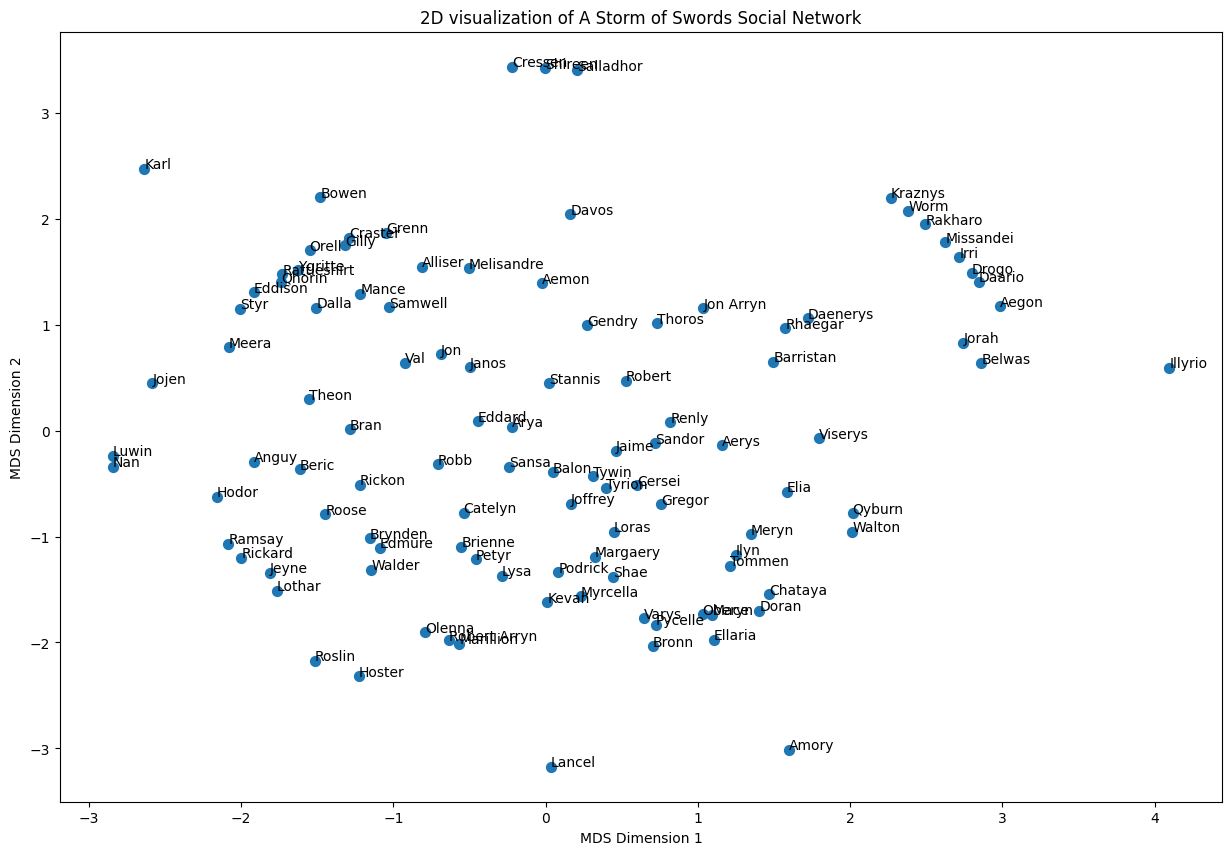

In [104]:
from sklearn.manifold import MDS

# Write your code here (15 points)

length = dict(nx.all_pairs_shortest_path_length(G))
nodes = list(G.nodes())
node_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)
distance_matrix = np.zeros((n, n))

for i, node_i in enumerate(nodes):
    for j, node_j in enumerate(nodes):
        distance_matrix[i, j] = length[node_i][node_j]

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
nodes_2d = mds.fit_transform(distance_matrix)

plt.figure(figsize=(15, 10))
plt.scatter(nodes_2d[:, 0], nodes_2d[:, 1], s=50)

for i, node in enumerate(nodes):
    plt.annotate(node, (nodes_2d[i, 0], nodes_2d[i, 1]))

plt.title('2D visualization of A Storm of Swords Social Network')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.show()

*** Discuss your results here (5 points)***


The 2D visualization of the "A Storm of Swords" social network reveals interesting insights into character interactions. Characters are plotted based on their relationships, with closer distances implying stronger connections or more frequent interactions.

Clusters might represent alliances or groups that interact more densely within the storyline. This visual network can provide a overview of the social dynamics within the narrative, showing who might be central to the plot and how characters are interrelated. It's like a map of the complex social fabric of Westeros, with each character's position telling their relationships with others.